<a href="https://colab.research.google.com/github/reeves250/Test-1-/blob/main/%E5%B0%88%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_student = pd.read_csv("students_adaptability_level_online_education.csv")
df_student.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
i = 1
plt.figure(figsize = (15,25))
for feature in df_student:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df_student)
    i +=1

In [ ]:
df_student.drop("Education Level", axis=1, inplace=True)
df_student = df_student.drop(df_student[df_student['Age'] == '1-5'].index)
df_student = df_student.drop(df_student[df_student['Age'] == '6-10'].index)
df_student["Adaptivity Level"] = df_student["Adaptivity Level"].replace({"Moderate": 0, "Low": -1, "High": 1})
df_student["Financial Condition"] = df_student["Financial Condition"].replace({"Poor": 0, "Mid": 1, "Rich": 2})

In [ ]:
colors = ['red', 'violet', 'navy']
i = 1
plt.figure(figsize = (15,25))
for feature in df_student:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = df_student, palette = colors)
    i +=1

In [ ]:
colors = ['red', 'violet', 'navy']
i = 1
plt.figure(figsize = (15,25))
for feature in df_student:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Financial Condition', data = df_student, palette = colors)
    i +=1

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_student['IT Student'] = label_encoder.fit_transform(df_student['IT Student'])
df_student['Location'] = label_encoder.fit_transform(df_student['Location'])
df_student['Self Lms'] = label_encoder.fit_transform(df_student['Self Lms'])
df_student['Internet Type'] = label_encoder.fit_transform(df_student['Internet Type']) #Wifi as 1, Mobile Data as 0
df_student['Age'] = label_encoder.fit_transform(df_student['Age'])
df_student['Network Type'] = label_encoder.fit_transform(df_student['Network Type'])
df_student['Class Duration'] = label_encoder.fit_transform(df_student['Class Duration'])

df_student["Financial Condition"] = df_student["Financial Condition"].replace({"Poor": 0, "Mid": 1, "Rich": 2})
df_student["Gender"] = df_student["Gender"].replace({"Boy": 1, "Girl": 2})
df_student["Institution Type"] = df_student["Institution Type"].replace({"Non Government": 0, "Government": 1})
df_student["Load-shedding"] = df_student["Load-shedding"].replace({"Low": 1, "High": 2})
df_student["Internet Type"] = df_student["Load-shedding"].replace({"Low": 1, "High": 2})
df_student["Device"] = df_student["Device"].replace({"Tab": 1, "Mobile": 2, "Computer": 3})

df_student.head()

In [ ]:
dataplot = sns.heatmap(df_student.corr(), cmap="YlGnBu", annot=True)
figsize=(200,200)
sns.set(font_scale=0.58)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_student.drop(columns="Adaptivity Level")
y = df_student["Adaptivity Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

y_pred1 = classifier1.predict(X_test)
score1 = accuracy_score(y_test, y_pred1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(n_neighbors=3)
classifier2.fit(X_train, y_train)

y_pred2 = classifier2.predict(X_test)
score2 = accuracy_score(y_test, y_pred2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier()
classifier3.fit(X_train, y_train)

y_pred3 = classifier3.predict(X_test)
score3 = accuracy_score(y_test, y_pred3)

In [ ]:
scores = [score1, score2, score3]
classes = ['LogisticRegression', 'KNeighborsClassifier', 'RandomForest']
color2 = ['c', 'g', 'y']

Text(0, 0.5, 'Classifiers Accuracy Score')

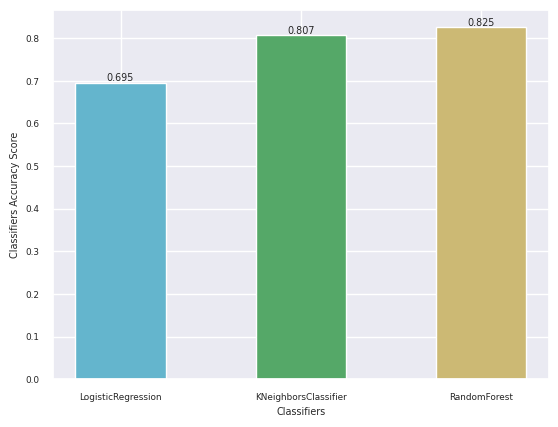

In [ ]:
fig, ax = plt.subplots()
bars = ax.bar(classes, scores, color = color2, width = 0.5)

for bar in bars:
    height = bar.get_height()
    label = '{:.3f}'.format(height)
    ax.text(bar.get_x() + bar.get_width() / 2, height, label,
            ha='center', va='bottom')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Classifiers Accuracy Score')
#s110029004@smail.nchu.edu.tw

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

          -1       0.81      0.86      0.83       104
           0       0.86      0.85      0.85       149
           1       0.83      0.62      0.71        16

    accuracy                           0.84       269
   macro avg       0.83      0.78      0.80       269
weighted avg       0.84      0.84      0.84       269



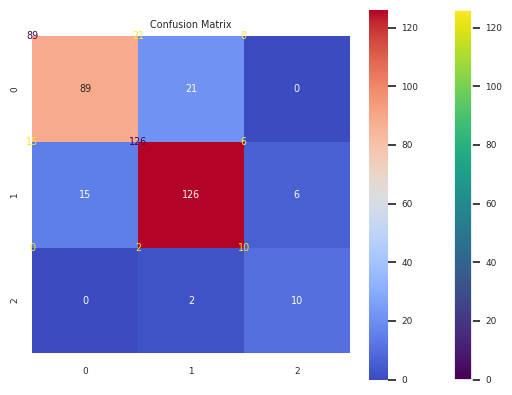

In [ ]:
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d")
plt.show()

In [ ]:
feature_importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
9,Class Duration,0.191824
6,Financial Condition,0.142972
1,Age,0.140327
0,Gender,0.084904
8,Network Type,0.071126
11,Device,0.069030
4,Location,0.066167
2,Institution Type,0.063783
3,IT Student,0.061264
10,Self Lms,0.058827
